In [3]:
import numpy as np 
import math
import scipy.stats
import matplotlib.pyplot as plt

## Question2

In [4]:
theta = 0.9
Lambda = 0.25
mu = 0.5
n = 100_000
u = np.random.uniform(0, 1, n) 
v = np.random.uniform(0, 1, n)

def inverse_Fx(u):
    return -np.log(1-u) / Lambda
def inverse_Fyx(v, x):
    a = theta * (2 * np.exp(-Lambda*x) - 1)
    numerator = (a-1) + np.sqrt((1-a)**2+4*a*(1-v)) 
    return -np.log(numerator/(2*a)) / mu
x = inverse_Fx(u)
y = inverse_Fyx(v, x)

In [5]:
np.corrcoef(x, y)[0][1]

0.2256272464313669

## Question3 --Acceptance-rejection Sampling

In [6]:
# Params initiate
A = 1
B = 1 / (np.sqrt(2*math.pi) * (1 - scipy.stats.norm.cdf(A))) 
C = B * np.exp((-1/2) * (A ** 2))
n = 1000
x = np.zeros(n)
def fX(x):
    return B * np.exp(-(x**2) / 2) 
def fY(y):
    return np.exp(-A * (y-A))

In [7]:
# acceptance-rejection sampling
i = 0
while i < n:
    u = np.random.uniform(0, 1)
    v = np.random.uniform(0, 1)
    z = -np.log(1-u)
    y = A + z / A
    if v <= fX(y) / (C * fY(y)):
        x[i] = y 
        i += 1

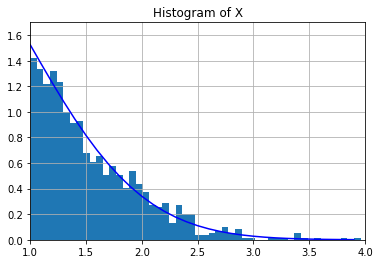

In [8]:
x_range = np.arange(1, 4, 0.1)
dense = B * np.exp(- (x_range**2) / 2) 
plt.plot(x_range, dense, color='b')
plt.hist(x, bins=50, density=True)
plt.xlim(1,4)
plt.ylim(0,1.7)
plt.title('Histogram of X')
plt.grid()

## Question4 --Heston model
### Question4. (c) --Euler discretization of the SDE

In [9]:
# Params initiate
r = 0.01
theta = 0.08
k = 2
beta = 0.2
rho = -0.7
Y0, S0 = 0.04, 50
T = 0.25
dt = (1/360) * (1/3)
M = int(0.25 / dt)

In [10]:
# Euler discretization
Y = np.zeros((10000, int(T / dt+1)))
S = np.zeros((10000, int(T / dt+1)))
Y[:, 0] = 0.04
S[:, 0] = 50

ζ = np.random.normal(0, 1, (10000, int(T / dt+1)))  # params: loc, scale, size
η = np.random.normal(0, 1, (10000, int(T / dt+1)))
for m in range(1, int(T / dt+1)):
    S[:, m] = S[:, m-1] * (r*dt + np.sqrt(Y[:, m-1]) * \
                           np.sqrt(dt) * ζ[:, m-1]) + S[:, m-1]
    Y[:, m] = (theta - k * Y[:, m-1]) * dt + beta * np.sqrt(Y[:, m-1]) * \
                                    np.sqrt(dt)*(rho * ζ[:, m-1] + \
                                    np.sqrt(1-rho**2) * η[:, m-1]) + Y[:, m-1]

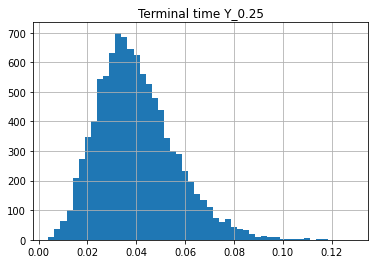

In [11]:
# Histogram of Y_0.25
plt.hist(Y[:, M], bins=50)
plt.title('Terminal time Y_0.25')
plt.grid()

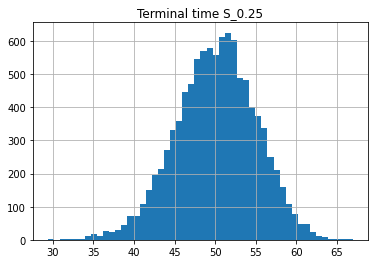

In [12]:
# Histogram of S_0.25
plt.hist(S[:, M], bins=50)
plt.title('Terminal time S_0.25')
plt.grid()

### Question4. (d) --Monte Carlo estimates of E(S_0.25) & E(Y_0.25)

In [13]:
times = 10_000
E_S = np.zeros(times)
E_Y = np.zeros(times)
std_S = np.zeros(times)
std_Y = np.zeros(times)
paths = np.arange(times)  # Here I use number of paths = 10,000

for n in range(times):
    E_S[n] = np.mean(S[0:n+1, M])
    E_Y[n] = np.mean(Y[0:n+1, M])
    std_S[n] = np.std(S[0:n+1, M])
    std_Y[n] = np.std(Y[0:n+1, M])

print('The mean of S converges to', E_S[-1])
print('The mean of T converges to', E_Y[-1])
print('The std of S converges to', std_S[-1])
print('The std of Y converges to', std_Y[-1])

The mean of S converges to 50.10319105375662
The mean of T converges to 0.040086799459003
The std of S converges to 4.936491254286175
The std of Y converges to 0.01603692375938775


Text(0.5, 1.0, 'Estimates of E[S_0.25]')

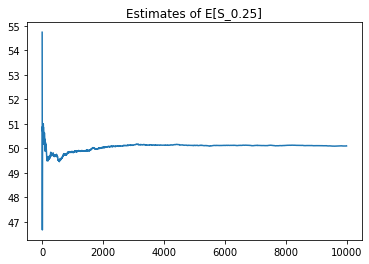

In [14]:
plt.plot(paths, E_S)
plt.title('Estimates of E[S_0.25]')

Text(0.5, 1.0, 'Estimates of E[Y_0.25]')

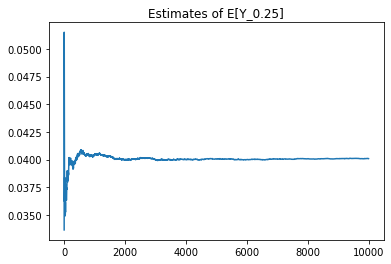

In [15]:
plt.plot(paths, E_Y)
plt.title('Estimates of E[Y_0.25]')

### Question4. (e) --Barrier option using Monte Carlo (95% confidence interval)

In [17]:
N = 5000
K = 50
A = 80
B = 30
r = 0.01

In [18]:
payoff = np.zeros(N)
paths = np.arange(1, N+1)
for i in range(N):
    payoff[i] = max(S[i, M] - K, 0) 
else:
    payoff[i] = 0

In [19]:
price = np.zeros(N)
std_payoff = np.zeros(N)
for i in range(N):
    price[i] = np.mean(payoff[0: i+1]) / ((1+r)**0.25) 
    std_payoff[i] = np.std(payoff[0: i+1])

Text(0.5, 1.0, 'Estimated option price (95% CI)')

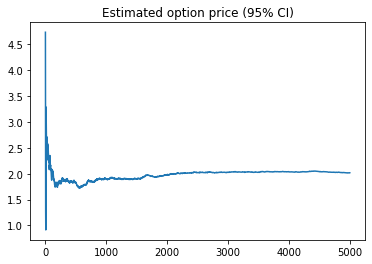

In [20]:
plt.plot(paths, price)
plt.title('Estimated option price (95% CI)') 

Text(0.5, 1.0, 'Standard Erros')

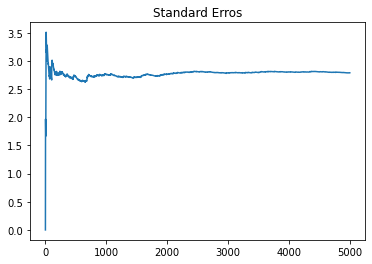

In [22]:
plt.plot(paths, std_payoff) 
plt.title('Standard Erros') 

I have chosen N = 50,000 here, but as what could be told from the plots, around n = 2,000, the price as well as the error connverge.